# CostPro Quarterly Sales Metrics Dashboard

As a Junior Data Scientist at a online retailer, CostPro, you have the opportunity to work on a project that will have a major impact on the company. Your goal is to create a metrics dashboard that will provide a clear overview of the business' sales metrics, which your leadership team can use to guide business decisions. You'll use measures of central tendency and variability to help CostPro better understand their quarterly sales and visualize the likelihood that a customer will arrive on the website in a given time interval.

## Project Setup

First, we need to download and import all of the dependencies that we will need for the project

### Dependencies

In [129]:
# Install all required dependencies for the project
!pip install -qqq numpy pandas seaborn matplotlib gdown plotly scipy
!pip install -qqq --force-reinstall protobuf==3.20 ##We need this to avoid version incompatibilities between packages

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-api-core 2.11.1 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0.dev0,>=3.19.5, but you have protobuf 3.20.0 which is incompatible.
google-cloud-bigquery 3.10.0 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.19.5, but you have protobuf 3.20.0 which is incompatible.
google-cloud-bigquery-connection 1.12.1 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.19.5, but you have protobuf 3.20.0 which is incompatible.
google-cloud-bigquery-storage 2.22.0 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.19.5, but you have protobuf 3.20.0 which is incompatible.
google-cloud-datastore 2.15.2 requires protobuf!=3

In [130]:
# Import dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import shutil
import gdown
from google.colab import files

# [TO BE IMPLEMENTED]
# Feel free to add any other imports that you need to write your own custom metrics

## Data

[Online Retail](https://archive.ics.uci.edu/ml/datasets/online+retail) is a collection of roughly 400,000 records from an international online retail dataset. For this project, we will use a slightly modified (cleaned up) version of this dataset as the sales data for CostPro.

### Download the Dataset

In [131]:
# Download the file from co:rise google drive
file_name = "online_retail.csv"
unique_id = "16HZKULqv2sX6AMqi4A8ndQ9ULeCLo4Qt"
gdown.download(id=unique_id, output=file_name)

Downloading...
From: https://drive.google.com/uc?id=16HZKULqv2sX6AMqi4A8ndQ9ULeCLo4Qt
To: /content/online_retail.csv
100%|██████████| 44.5M/44.5M [00:00<00:00, 52.3MB/s]


'online_retail.csv'

### Clean & Prepare the Dataset

Now we'll import the data as a pandas dataframe. The code below will show you the first 5 rows of the dataframe, but feel free to explore the data further!

In [132]:
# import data and show first 5 rows
data = pd.read_csv(file_name)
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/21 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/21 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/21 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/21 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/21 8:26,3.39,17850.0,United Kingdom


## Project Jumpstart

### Explore Basic Statistics You Get Out of the Box with Pandas

In [133]:
# check record count and column count
data.shape

(541909, 8)

In [134]:
# review basic information about the dataset including column names, data types, non-null counts, and memory usage
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [135]:
# check the number of missing values in each column
data.isnull().sum(axis=0)

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

On the job, you'll need to explore if there are specific patterns to the missing values. For the sake of expediency and simplicity in this project, we'll drop them.

In [136]:
# Drop missing values and validate that there are no missing values after the fix
data = data.dropna().reset_index(drop=True)
data.isnull().sum(axis=0)

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [137]:
# Check the number of unique values in each column
data.nunique()

InvoiceNo      22190
StockCode       3684
Description     3896
Quantity         436
InvoiceDate    20460
UnitPrice        620
CustomerID      4372
Country           37
dtype: int64

In [138]:
# Use pandas describe() method to get a summary of the numerical columns
basic_stats = pd.DataFrame(data.describe())
basic_stats

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


Now we need to create columns for Year, Month, Day, and Quarter so that your leadership team at CostPro can look at statistics for specific time periods in your dashboard.

In [139]:
# Format date columns
# Note: the pandas to_datetime function is being deprecated in the near future
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

data["Year"] = data["InvoiceDate"].dt.year
data["Month"] = data["InvoiceDate"].dt.month
data["Day"] = data["InvoiceDate"].dt.day
data["Quarter"] = data["InvoiceDate"].dt.quarter

### Clean the Data

Check the basic stats on the numeric data again, what do you notice?

In [140]:
basic_stats

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


Look at the quantity minimum! `-80995.000000`

Let's take a look at the dataset again to figure out what's going on!

In [141]:
# Review records where the quantity is less than 0
data[data['Quantity'] < 0].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Quarter
141,C536379,D,Discount,-1,2021-12-01 09:41:00,27.50,14527.0,United Kingdom,2021,12,1,4
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2021-12-01 09:49:00,4.65,15311.0,United Kingdom,2021,12,1,4
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2021-12-01 10:24:00,1.65,17548.0,United Kingdom,2021,12,1,4
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2021-12-01 10:24:00,0.29,17548.0,United Kingdom,2021,12,1,4
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2021-12-01 10:24:00,0.29,17548.0,United Kingdom,2021,12,1,4


After closer examination, we can see that both the quantities and pricing are negative. We can also see that the Invoice Numbers are prepended with a `C`.

A quick glance at the data docs tells us that "InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation."

In [142]:
# Create a function to remove cancelled orders
def remove_cancelled_orders(data):
    # Create a subset of the data that only has cancelled invoices
    cancelled_invoices = data[data['InvoiceNo'].str.contains('C')]

    # Create a new column that contains the original invoice number
    cancelled_invoices['OriginalInvoiceNo'] = cancelled_invoices['InvoiceNo'].str.replace('C', '')

    # Filter the dataset to only include invoices that haven't been cancelled
    data = data[~data['InvoiceNo'].str.contains('C')]

    # Filter the data by the original invoice number on the cancelled invoices
    return data[~data['InvoiceNo'].isin(cancelled_invoices['OriginalInvoiceNo'])]

data = remove_cancelled_orders(data)

data.head()

# Review the data again to ensure that the cancelled orders have been removed
assert data[data['InvoiceNo'].str.contains('C')].shape[0] == 0


<ipython-input-142-ffee889b80c9>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Great! That's looking much better! Now the minimum quantity is 1.

On the job, we'd definitely want to dig into what products get returned and at what rate and factor returns into total sales. For the sake of expediency in this project, we're going to ignore cancellations and returns.

### Create Useful Aggregations

In [143]:
# Create a column that represents the total price of each item
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']

In [144]:
# Create a dataframe that represents the total value of each order
total_value_per_order = pd.DataFrame(data.groupby('InvoiceNo')['TotalPrice'].sum())
total_value_per_order.head()

,TotalPrice
InvoiceNo,
536365,139.12
536366,22.20
536367,278.73
536368,70.05
536369,17.85


### Measures of Central Tendency

#### Mean

In [145]:
# Calculate the average total value of each order
total_value_per_order['TotalPrice'].mean()

480.7621873111782

#### Median

In [146]:
# Calculate the median total value of each order
total_value_per_order['TotalPrice'].median()

303.02

Since there's a sizeable difference between the mean and the median, we know the data is skewed. This means we should probably display the median on the dashboard and also visualize the data distribution to highlight the skew.

#### Inter-Quartile Range
Use Interquartile range to help you understand the central tendencies and range of the data.

<Axes: >

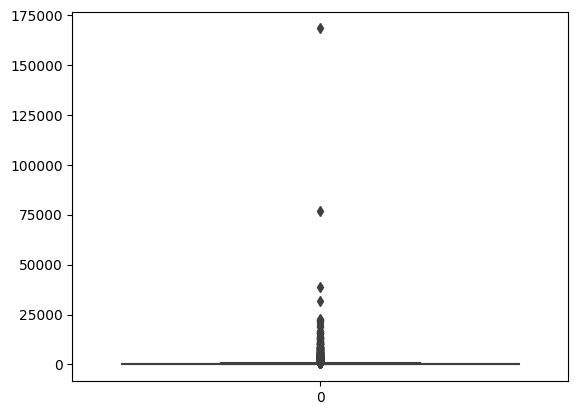

In [147]:
# visualize the interquartile range of the total price as a boxplot
sns.boxplot(total_value_per_order['TotalPrice'])

In [148]:
# Remove outliers that are more than 1.5 times the interquartile range
q1 = total_value_per_order['TotalPrice'].quantile(0.25)
q3 = total_value_per_order['TotalPrice'].quantile(0.75)
iqr = q3 - q1
total_value_per_order = total_value_per_order[(total_value_per_order['TotalPrice'] >= q1 - 1.5 * iqr) & (total_value_per_order['TotalPrice'] <= q3 + 1.5 * iqr)]

<Axes: >

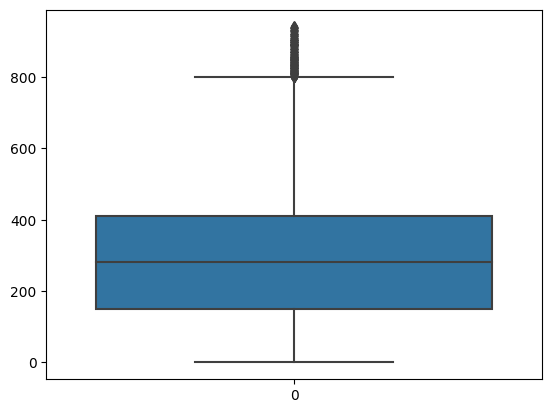

In [149]:
# Check the boxplot again
sns.boxplot(total_value_per_order['TotalPrice'])

In [150]:
# Reset the index to make it easier to filter on InvoiceNo
total_value_per_order = total_value_per_order.reset_index(level=0)

In [151]:
# Filter the data by the dataframe where we've removed outliers
data = data[data['InvoiceNo'].isin(total_value_per_order['InvoiceNo'])]
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Quarter,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2021-12-01 08:26:00,2.55,17850.0,United Kingdom,2021,12,1,4,15.30
1,536365,71053,WHITE METAL LANTERN,6,2021-12-01 08:26:00,3.39,17850.0,United Kingdom,2021,12,1,4,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2021-12-01 08:26:00,2.75,17850.0,United Kingdom,2021,12,1,4,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2021-12-01 08:26:00,3.39,17850.0,United Kingdom,2021,12,1,4,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2021-12-01 08:26:00,3.39,17850.0,United Kingdom,2021,12,1,4,20.34


Now we're seeing a dataset that looks a lot more like what we'd expect to see for purchase data, however, there is still a lot of variability.

### Measures of Variability

#### Standard Deviation

In [152]:
# Calculate the standard deviation of the total value of each order
total_value_per_order['TotalPrice'].std()

203.29176034742505

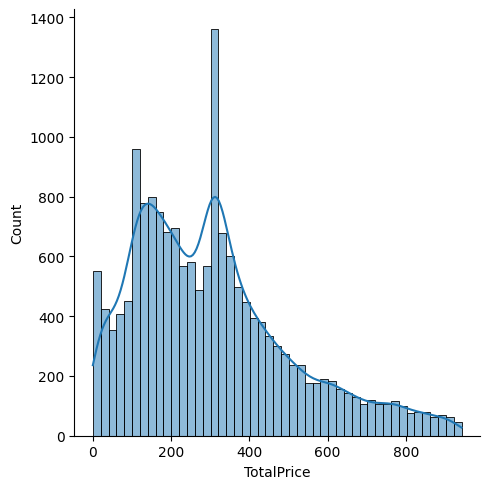

In [153]:
# Visualize the distribution of the total order value
sns.displot(total_value_per_order['TotalPrice'], kde=True)

#### Variance

In [154]:
# Calculate the variance of the total value of each order
total_value_per_order['TotalPrice'].var()

41327.5398251549

#### Maximum

In [155]:
# Calculate the maximum order value
maximum_order_value = round(total_value_per_order['TotalPrice'].max(), 2)
maximum_order_value

942.1

#### Minimum

In [156]:
# Calculate the minimum order value
minimum_order_value = round(total_value_per_order['TotalPrice'].min(), 2)
minimum_order_value

0.0

#### Range
What is the new range of this dataset after removing outliers?

In [157]:
# Calculate the range of the total value of each order
maximum_order_value - minimum_order_value

942.1

## Your Turn! Apply This Week's Concepts

You'll be writing these tasks inside python functions. This helps you in many ways:

- easier for you to debug
- easier for you to test
- allows you to set up metrics for your dashboard without re-writing this code later!

### Filter Data By Year and Quarter

Here's an example, you get the first one for free!

In [158]:
# Write a function to filter a pandas dataframe by year and quarter
def filter_by_year_and_quarter(df, year, quarter):

    # Filter the dataframe by the year and quarter
    filtered_df = df[(df['Year'] == year) & (df['Quarter'] == quarter)]

    # Return the filtered dataframe
    if filtered_df.shape[0] > 0:
        return filtered_df
    else:
        assert filtered_df.shape[0] > 0, "There are no records for the specified year and quarter"

In [159]:
# Create a dataframe that only contains records for 2022 Q4
print(filter_by_year_and_quarter(data, 2022, 4).head(5))

# Write a test to validate the function
assert filter_by_year_and_quarter(data, 2022, 4)['Year'].unique()[0] == 2022, "There should only be records for 2022"
assert filter_by_year_and_quarter(data, 2022, 4)['Quarter'].unique()[0] == 4, "There should be records for Q4"

       InvoiceNo StockCode                    Description  Quantity  \
272875    569203     79321                  CHILLI LIGHTS        48   
272876    569203     21154      RED RETROSPOT OVEN GLOVE         20   
272877    569204     21790             VINTAGE SNAP CARDS         4   
272878    569204     23284  DOORMAT KEEP CALM AND COME IN        15   
272879    569204     23355     HOT WATER BOTTLE KEEP CALM         4   

               InvoiceDate  UnitPrice  CustomerID         Country  Year  \
272875 2022-10-02 10:32:00       4.95     16353.0  United Kingdom  2022   
272876 2022-10-02 10:32:00       1.25     16353.0  United Kingdom  2022   
272877 2022-10-02 10:43:00       0.85     16591.0  United Kingdom  2022   
272878 2022-10-02 10:43:00       7.08     16591.0  United Kingdom  2022   
272879 2022-10-02 10:43:00       4.95     16591.0  United Kingdom  2022   

        Month  Day  Quarter  TotalPrice  
272875     10    2        4       237.6  
272876     10    2        4        25.

### Calculate Total Sales (Sum)

In [160]:
def total_sales(data: pd.DataFrame, year: int, quarter: int) -> float:
    """
    Calculate the total sales for a given year and quarter
    :param data: The dataframe containing the data
    :param year: The year to calculate the total sales for
    :param quarter: The quarter to calculate the total sales for
    :return: The total sales for the given year and quarter
    """
    # Filter the data by the given year and quarter
    data = filter_by_year_and_quarter(data, year, quarter)

    # Calculate the total sales
    return round(data['TotalPrice'].sum(), 2)

In [161]:
# Calculate the total sales for 2022 Q4
print(f'The total sales for 2022 Q4 are: ${total_sales(data, 2022, 4)}')

The total sales for 2022 Q4 are: $1519366.35


### How Many Customers Are There Per Day? (Mean)

In [162]:
# Write a function to calculate mean number of customers per day
def mean_customers_per_day(data: pd.DataFrame, year: int, quarter: int) -> float:
    """
    Calculate the mean number of customers per day for a given year and quarter
    :param data: The dataframe containing the data
    :param year: The year to calculate the mean number of customers per day for
    :param quarter: The quarter to calculate the mean number of customers per day for
    :return: The mean number of customers per day for the given year and quarter
    """
    # Filter the data by the given year and quarter
    data = filter_by_year_and_quarter(data, year, quarter)

    # Calculate the mean number of customers per day
    data_grouped = data.groupby(pd.Grouper(key='InvoiceDate', freq='D'))['CustomerID'].nunique()
    average_customers_per_day = data_grouped.mean()
    return round(average_customers_per_day, 1)

In [163]:
# Calculate the mean number of customers per day for 2022 Q4
output_of_mean_customers_per_day = mean_customers_per_day(data, 2022, 4)
# print(output_of_mean_customers_per_day)
print(f'The mean number of customers per day for 2022 Q4 is: {output_of_mean_customers_per_day}')

# Write a test to validate the mean number of customers per day function
# assert <YOUR CODE HERE>, "your message here"

The mean number of customers per day for 2022 Q4 is: 65.0


### How Much Do Customers Spend Per Order? (Median)

In [164]:
# Write a function to calculate the median order value for a given year and quarter
def median_order_value(data: pd.DataFrame, year: int, quarter: int) -> float:
    """
    Calculate the median order value for a given year and quarter
    :param data: The dataframe containing the data
    :param year: The year to calculate the median order value for
    :param quarter: The quarter to calculate the median order value for
    :return: The median order value for the given year and quarter
    """
    # Filter the data by the given year and quarter
    filtered_data = filter_by_year_and_quarter(data, year, quarter)

    # Group data by InvoiceNo and calculate the total value of each order
    grouped_data = filtered_data.groupby('InvoiceNo').apply(lambda x: (x['Quantity'] * x['UnitPrice']).sum())

    # Calculate the median order value
    median_order_value = grouped_data.median()

    return median_order_value

In [165]:
# Calculate the median order value for 2022 Q4
print(f'The median order value for 2022 Q4 is: ${round(median_order_value(data, 2022, 4), 2)}')

The median order value for 2022 Q4 is: $285.4


In [166]:
# Write a test to validate the median order value function
# assert <YOUR CODE HERE>

### How Variable Are Order Totals?

In [167]:
# Write a function to calculate the order value variability for a given year and quarter
def order_value_variability(data: pd.DataFrame, year: int, quarter: int) -> float:
    """
    Calculate the order value variability for a given year and quarter
    :param data: The dataframe containing the data
    :param year: The year to calculate the order value variability for
    :param quarter: The quarter to calculate the order value variability for
    :return: The order value variability for the given year and quarter
    """
    # Filter the data by the given year and quarter
    filtered_data = filter_by_year_and_quarter(data.copy(), year, quarter)

    # Group data by InvoiceNo and calculate the order total (Quantity * UnitPrice)
    order_totals = filtered_data.groupby('InvoiceNo').apply(lambda x: (x['Quantity'] * x['UnitPrice']).sum())

    # Calculate the order value variability (standard deviation of order totals)
    order_value_variability = order_totals.std()

    return order_value_variability

In [168]:
# Print out the order value variability for 2022 Q4
print(f'The standard deviation of order value for 2022 Q4 is: ${round(order_value_variability(data, 2022, 4), 2)}')

The standard deviation of order value for 2022 Q4 is: $203.29


In [169]:
# Write a test to validate the order value variability function
# assert <YOUR CODE HERE>

### What is the Most Popular Product? (Mode - Part 1)

In [170]:
def relevant_item_record(record: pd.Series) -> pd.Series:
    """
    Filters out order-specific fields from an item record.
    :param record: The item record as a pandas Series
    :return: A filtered item record containing only item-specific fields
    """

    # Define the fields that are item-specific and not order-specific
    relevant_fields = ['StockCode', 'Description', 'UnitPrice']

    return record[relevant_fields]

In [171]:
# Write a function to find the most popular product for a given year and quarter
def most_popular_product(data: pd.DataFrame, year: int, quarter: int) -> str:
    """
    Find the most popular product for a given year and quarter
    :param data: The dataframe containing the data
    :param year: The year to find the most popular product for
    :param quarter: The quarter to find the most popular product for
    :return: The most popular product for the given year and quarter
    """
    # Filter the data by the given year and quarter
    filtered_data = filter_by_year_and_quarter(data.copy(), year, quarter)

    # Group by StockCode and sum up the quantities
    product_popularity = filtered_data.groupby('StockCode')['Quantity'].sum()

    # Find the most popular product (one with the maximum summed quantity)
    most_popular_stockcode = product_popularity.idxmax()

    # Retrieve the full item record for the most popular product
    most_popular_record = filtered_data[filtered_data['StockCode'] == most_popular_stockcode].iloc[0]

    return relevant_item_record(most_popular_record)

In [172]:
# Find the most popular product for 2022 Q4
print(f'The most popular product for 2022 Q4 is:\n{most_popular_product(data, 2022, 4)}')

# Write a test to validate the most popular product function
# assert <YOUR CODE HERE>

The most popular product for 2022 Q4 is:
StockCode               22197
Description    POPCORN HOLDER
UnitPrice                0.85
Name: 273141, dtype: object


### What is the Most Profitable Product? (Mode - Part 2)

In [173]:
# Write a function to find the most profitable product for a given year and quarter
def highest_revenue_product(data: pd.DataFrame, year: int, quarter: int) -> str:
    """
    Find the highest revenue product for a given year and quarter
    :param data: The dataframe containing the data
    :param year: The year to find the most profitable product for
    :param quarter: The quarter to find the most profitable product for
    :return: The most profitable product for the given year and quarter
    """
    # Filter the data by the given year and quarter
    filtered_data = filter_by_year_and_quarter(data.copy(), year, quarter)

    # Calculate the revenue for each invoice item (Quantity * UnitPrice)
    filtered_data['Revenue'] = filtered_data['Quantity'] * filtered_data['UnitPrice']

    # Group by StockCode and sum up the revenues
    product_revenue = filtered_data.groupby('StockCode')['Revenue'].sum()

    # Find the highest revenue-generating product (one with the maximum summed revenue)
    highest_revenue_stockcode = product_revenue.idxmax()

    # Retrieve the full item record for the highest revenue-generating product
    highest_revenue_record = filtered_data[filtered_data['StockCode'] == highest_revenue_stockcode].iloc[0]

    return relevant_item_record(highest_revenue_record)

In [174]:
# Find the highest revenue product for 2022 Q4
print(f'The highest revenue product for 2022 Q4 is:\n{highest_revenue_product(data, 2022, 4)}')

# Write a test to validate the most profitable product function
# assert <YOUR CODE HERE>

The highest revenue product for 2022 Q4 is:
StockCode                   23084
Description    RABBIT NIGHT LIGHT
UnitPrice                    2.08
Name: 313733, dtype: object


## Your Turn: Build Custom Metrics (Optional)

Here's an example of a metric that you'd expect to see on sales dashboard: percentage of returning customers. Use this example as a template to write your own metric!

### What Percentage of Customers Become Return Customers?

In [175]:
def customer_retention_rate(data: pd.DataFrame, year: int, quarter: int) -> float:
    """
    Calculate the customer retention rate for a given year and quarter
    :param data: The dataframe containing the data
    :param year: The year to calculate the customer retention rate for
    :param quarter: The quarter to calculate the customer retention rate for
    :return: The customer retention rate for the given year and quarter
    """
    # Filter the data by the given year and quarter
    filtered_data = filter_by_year_and_quarter(data.copy(), year, quarter)

    # Count the number of unique invoices per customer
    invoice_count_per_customer = filtered_data.groupby('CustomerID')['InvoiceNo'].nunique()

    # Calculate the number of unique customers
    num_customers = invoice_count_per_customer.count()

    # Calculate the number of repeat customers (customers with more than one unique invoice)
    num_repeat_customers = invoice_count_per_customer[invoice_count_per_customer > 1].count()

    # Calculate the customer retention rate
    if num_customers == 0:  # To avoid division by zero
        return 0
    retention_rate = (num_repeat_customers / num_customers) * 100

    return retention_rate

In [176]:
# Calculate the customer retention rate for 2022 Q4
print(f'The customer retention rate for 2022 Q4 is: {round(customer_retention_rate(data, 2022, 4), 1)}%')

# Write tests to validate the customer retention rate function
# assert <YOUR CODE HERE>

The customer retention rate for 2022 Q4 is: 42.9%


## Make a Dashboard for Your Portfolio!

Optional, but ***Highly Encouraged***, Since You've Already Written the Code!

To bring our analysis to life we'll be using a toolkit known as Jupyter Widgets, alongside an interactive plot creation library called Plotly.

At this stage we don't anticipate that you're necessarily familiar with the ins and outs of how Jupyter Widgets function, but the code and links below should help you get started.

You're welcome to modify it as you please. In fact, data visualization is a crucial component of the data science toolkit, so if you're so inclined, give it a try! Some excellent starting points for learning about Jupyter Widgets can be found here, [here](https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20Basics.html), [here](https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html), and [here](https://towardsdatascience.com/bring-your-jupyter-notebook-to-life-with-interactive-widgets-bc12e03f0916)!

One potential place to start - can you come up with a better plot type for the data to show outliers? Have a scroll through what the plotly.express library can do [here](https://plotly.com/python/plotly-express/) for inspiration

In [178]:
import pandas as pd
import plotly.express as px
from ipywidgets import interact, Select, Output, link
from IPython.display import display, clear_output

from google.colab import output
output.enable_custom_widget_manager()

# Create a copy of the data we've processed,
#  in case we want to modify it some more
df = data.copy(deep=True)

# Create an output widget
out = Output()

# Define function to execute on change of filter
def metrics_and_visualization(year, quarter):
  # Filter the data for the selected year and quarter
  filtered_df = filter_by_year_and_quarter(df, year, quarter)

  # Sample our data, to make the visualisation less computionationally intensive
  filtered_df = filtered_df.sample(frac=0.1, random_state=42)

  out.clear_output(wait=True)
  with out:
    # Display the metrics
    print(f"Q{quarter} Total sales: ${total_sales(filtered_df, year, quarter)}")
    print(f"Q{quarter} Mean Number of Customers Per Day: {mean_customers_per_day(filtered_df, year, quarter)}")
    print(f"Q{quarter} Median Order Value: ${median_order_value(filtered_df, year, quarter)}")
    print(f"Q{quarter} Standard Deviation of Order Values: ${order_value_variability(filtered_df, year, quarter)}")
    print(f"Q{quarter} Most Popular Product:\n{most_popular_product(filtered_df, year, quarter)}")
    print(f"Q{quarter} Highest Revenue Product:\n{highest_revenue_product(filtered_df, year, quarter)}")
    print(f"Q{quarter} Customer retention rate: {customer_retention_rate(filtered_df, year, quarter)}%")

    # Create a scatterplot of unit prices for the selected quarter
    fig = px.scatter(
        filtered_df,
        x="UnitPrice",
        color="UnitPrice",
        width=800,
        height=400
    )
    fig.show()

# Create a selection widget to choose the quarter
year_widget = Select(options=df["Year"].unique().tolist(), description='Year:')
quarter_widget = Select(options=df["Quarter"].unique().tolist(), description='Quarter:')

# Display widgets
display(year_widget, quarter_widget, out)

# Define function to update quarters widget based on the selected year
def update_quarters(change):
    year = change['new']
    quarters = df[df["Year"] == year]["Quarter"].unique().tolist()
    quarter_widget.options = quarters
    quarter_widget.value = quarters[0] if quarters else None

# Bind the function to changes in the year widget
year_widget.observe(update_quarters, names='value')

# Bind the metrics_and_visualization function to changes in the widgets
def on_change(change):
    metrics_and_visualization(year_widget.value, quarter_widget.value)

quarter_widget.observe(on_change, names='value')

# Call function once to update quarters and display initial data
update_quarters({'new': year_widget.value})
metrics_and_visualization(year_widget.value, quarter_widget.value)

Select(description='Year:', options=(2021, 2022), value=2021)

Select(description='Quarter:', options=(4, 1, 2, 3), value=4)

Output()

We often want to share visualisations like this with our colleagues and let them play around but without exposing them to all the analysis code we took to get there. Luckily we can easily do this in Colab!
* go to `Edit` -> `Select All Cells`
* go to `View` -> `Show/hide code`

You can also go through and collapse individual sections that you don't want to share (e.g. the bit at the top where we installed some python libraries).

You can then share a link to the notebook (`Share` -> `Copy Link`, setting the `General Access` field appropriately) and then anyone you share the link with can open the notebook, run through it, and see your analysis!

#### 🚀 You Did It!!!

Congratulations, you've completed your first assignment in Applied Statistics for Data Science. If you deployed a streamlit app, please be sure to share the link when you submit your assignment for the week.